In [ ]:
# Первичное обучнеие модели с сохранением весов в файл
from keras_segmentation.models.segnet import segnet # Импорт библиотеки

model = segnet(n_classes=4 ,  input_height=450, input_width=480  ) # Создаем модель на 4 класса и задаем размер изображений 

# model.save_weights("savedmodels/segnet_1")

#Запускаем обучение модели 
model.train(
    train_images =  "wsisegdatasetmodified1/whole_sky_images_png_train",
    train_annotations = "wsisegdatasetmodified1/annotation_png_train",
    checkpoints_path = "./tmp/checkpoint" , epochs=1
#       train_images =  "dataset1/images_prepped_train/",
#       train_annotations = "dataset1/annotations_prepped_train/",
#       checkpoints_path = "./tmp/vgg_unet_1" , epochs=0
)

model.save_weights("savedmodels/saved_weights_try_8_step_1")

  0%|                                                                                          | 0/360 [00:00<?, ?it/s]

Verifying training dataset


100%|███████████████████████████████████████████████████████████████████████████████| 360/360 [00:02<00:00, 129.06it/s]
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Dataset verified! 
Epoch 1/20
512/512 [==============================] - 1775s 3s/step - loss: 0.1210 - accuracy: 0.9527
saved  ./tmp/checkpoint.0
Epoch 2/20
512/512 [==============================] - 1730s 3s/step - loss: 0.1189 - accuracy: 0.9534
saved  ./tmp/checkpoint.1
Epoch 3/20
512/512 [==============================] - 1729s 3s/step - loss: 0.1194 - accuracy: 0.9531
saved  ./tmp/checkpoint.2
Epoch 4/20
512/512 [==============================] - 1731s 3s/step - loss: 0.1178 - accuracy: 0.9537
saved  ./tmp/checkpoint.3
Epoch 5/20
512/512 [==============================] - 1728s 3s/step - loss: 0.1167 - accuracy: 0.9541
saved  ./tmp/checkpoint.4
Epoch 6/20
512/512 [==============================] - 1730s 3s/step - loss: 0.1148 - accuracy: 0.9549
saved  ./tmp/checkpoint.5
Epoch 7/20
512/512 [==============================] - 1729s 3s/step - loss: 0.1159 - accuracy: 0.9545
saved  ./tmp/checkpoint.6
Epoch 8/20
512/512 [==============================] - 1730s 3s/step - loss: 0.1144 - 

40it [00:13,  2.98it/s]

{'frequency_weighted_IU': 0.9223719644579307, 'frequency_weighted_presision': 0.9587521330400859, 'frequency_weighted_recall': 0.9588904389880952, 'frequency_weighted_fscore': 0.9587955635878641, 'mean_IU': 0.8413651161605132, 'mean_presision': 0.9171431095057028, 'mean_recall': 0.8968815011674338, 'mean_fscore': 0.9064433446733081, 'class_wise_IU': array([0.98534483, 0.88813744, 0.59774675, 0.89423145]), 'cl_wise_presision': array([0.99171844, 0.94455418, 0.79155285, 0.94074696]), 'cl_wise_recall': array([0.99351985, 0.9369864 , 0.7094162 , 0.94760356]), 'cl_wise_fscore': array([0.99261833, 0.94075507, 0.74823716, 0.94416281])}


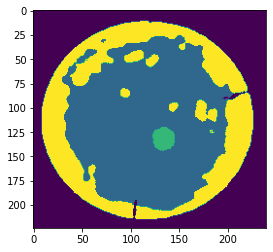

In [1]:
# Обучнеие модели с использованием полученных ранее весов
from keras_segmentation.models.segnet import segnet

model = segnet(n_classes=4 ,  input_height=450, input_width=480  )

# model.save("savedmodels/saved_model_0")
#Загрузка ранее полученных весовб скриптом выше
model.load_weights("savedmodels/goodmodels/segnet_4c/saved_weights_try_6_step_3")
                                
model.train(
    train_images =  "wsisegdatasetmodified1/whole_sky_images_png_train",
    train_annotations = "wsisegdatasetmodified1/annotation_png_train",
    checkpoints_path = "./tmp/checkpoint" , epochs=20
#       train_images =  "dataset1/images_prepped_train/",
#       train_annotations = "dataset1/annotations_prepped_train/",
#       checkpoints_path = "./tmp/vgg_unet_1" , epochs=10
)

model.save_weights("savedmodels/goodmodels/segnet_4c/saved_weights_try_6_step_4")
# model.save_weights("savedmodels/goodmodels/unet_4c/saved_weights_try_6_step_2")

out = model.predict_segmentation(
    inp="wsisegdataset1/whole_sky_images_png_test/ASC100-1006_400.png",
    out_fname="/tmp/out.png"
)

import matplotlib.pyplot as plt
plt.imshow(out)

# evaluating the model 
print(model.evaluate_segmentation( inp_images_dir="wsisegdatasetmodified1/whole_sky_images_png_test/"  , annotations_dir="wsisegdatasetmodified1/annotation_png_test/" ) )